In [1]:
# Importação de bibliotecas
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [2]:
train_data_dir = '/kaggle/input/pneumonia-xray-images/train'
valid_data_dir = '/kaggle/input/pneumonia-xray-images/val'
test_data_dir = '/kaggle/input/pneumonia-xray-images/test'

In [3]:
# Criação do gerador de dados com aumento de dados
datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=20,
                             zoom_range=0.2,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             horizontal_flip=True)

# Criação do gerador de treinamento
train_generator = datagen.flow_from_directory(train_data_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='binary')

# Criação do gerador de validação
valid_generator = datagen.flow_from_directory(valid_data_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='binary')

Found 4192 images belonging to 2 classes.
Found 1040 images belonging to 2 classes.


In [5]:
# Criação do modelo ResNet50
base_model = ResNet50(weights='imagenet', include_top=False)

# Adição das camadas de topo ao modelo ResNet50
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Criação do modelo final
model = Model(inputs=base_model.input, outputs=predictions)

# Compilação do modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

94765736/94765736 [==============================] - 1s 0us/step


In [18]:
# Treinamento do modelo
history = model.fit(train_generator,
          epochs=15,
          validation_data=valid_generator)

Epoch 1/15
131/131 [==============================] - 130s 991ms/step - loss: 0.0578 - accuracy: 0.9804 - val_loss: 0.7510 - val_accuracy: 0.7673
Epoch 2/15
131/131 [==============================] - 129s 984ms/step - loss: 0.0524 - accuracy: 0.9819 - val_loss: 5.6651 - val_accuracy: 0.2952
Epoch 3/15
131/131 [==============================] - 147s 1s/step - loss: 0.0675 - accuracy: 0.9754 - val_loss: 0.2353 - val_accuracy: 0.8971
Epoch 4/15
131/131 [==============================] - 130s 989ms/step - loss: 0.0565 - accuracy: 0.9807 - val_loss: 0.3910 - val_accuracy: 0.8404
Epoch 5/15
131/131 [==============================] - 130s 993ms/step - loss: 0.0582 - accuracy: 0.9773 - val_loss: 1.4243 - val_accuracy: 0.7635
Epoch 6/15
131/131 [==============================] - 129s 984ms/step - loss: 0.0536 - accuracy: 0.9804 - val_loss: 2.6037 - val_accuracy: 0.7538
Epoch 7/15
131/131 [==============================] - 144s 1s/step - loss: 0.0474 - accuracy: 0.9840 - val_loss: 2.3847 - val_a

In [19]:
# Avaliação do modelo
test_generator = datagen.flow_from_directory(test_data_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary',
                                             shuffle=False)
loss, accuracy = model.evaluate(test_generator)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Found 624 images belonging to 2 classes.
20/20 [==============================] - 14s 689ms/step - loss: 0.3349 - accuracy: 0.8974
Test loss: 0.3348638415336609
Test accuracy: 0.8974359035491943


Found 624 images belonging to 2 classes.
20/20 [==============================] - 14s 660ms/step


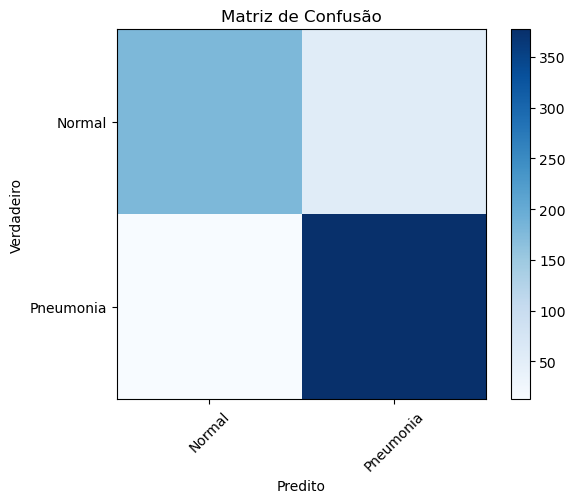

              precision    recall  f1-score   support

      Normal       0.93      0.76      0.84       234
   Pneumonia       0.87      0.97      0.92       390

    accuracy                           0.89       624
   macro avg       0.90      0.87      0.88       624
weighted avg       0.90      0.89      0.89       624



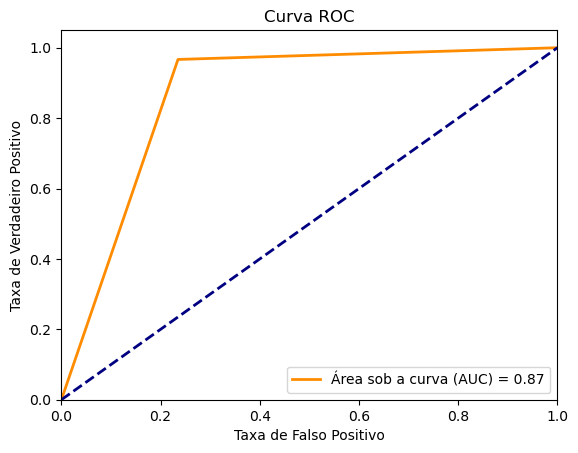

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Gere as previsões para o conjunto de teste
test_generator = datagen.flow_from_directory(test_data_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary',
                                             shuffle=False)

y_pred = model.predict(test_generator)
y_pred = np.round(y_pred)

# Obtenha as verdadeiras classes de teste
y_true = test_generator.classes

# Gere a matriz de confusão
cm = confusion_matrix(y_true, y_pred)

# Plote a matriz de confusão
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Normal', 'Pneumonia'], rotation=45)
plt.yticks(tick_marks, ['Normal', 'Pneumonia'])
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

# Gere o relatório de classificação
target_names = ['Normal', 'Pneumonia']
print(classification_report(y_true, y_pred, target_names=target_names))

# Plote a curva ROC
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Área sob a curva (AUC) = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


Found 624 images belonging to 2 classes.


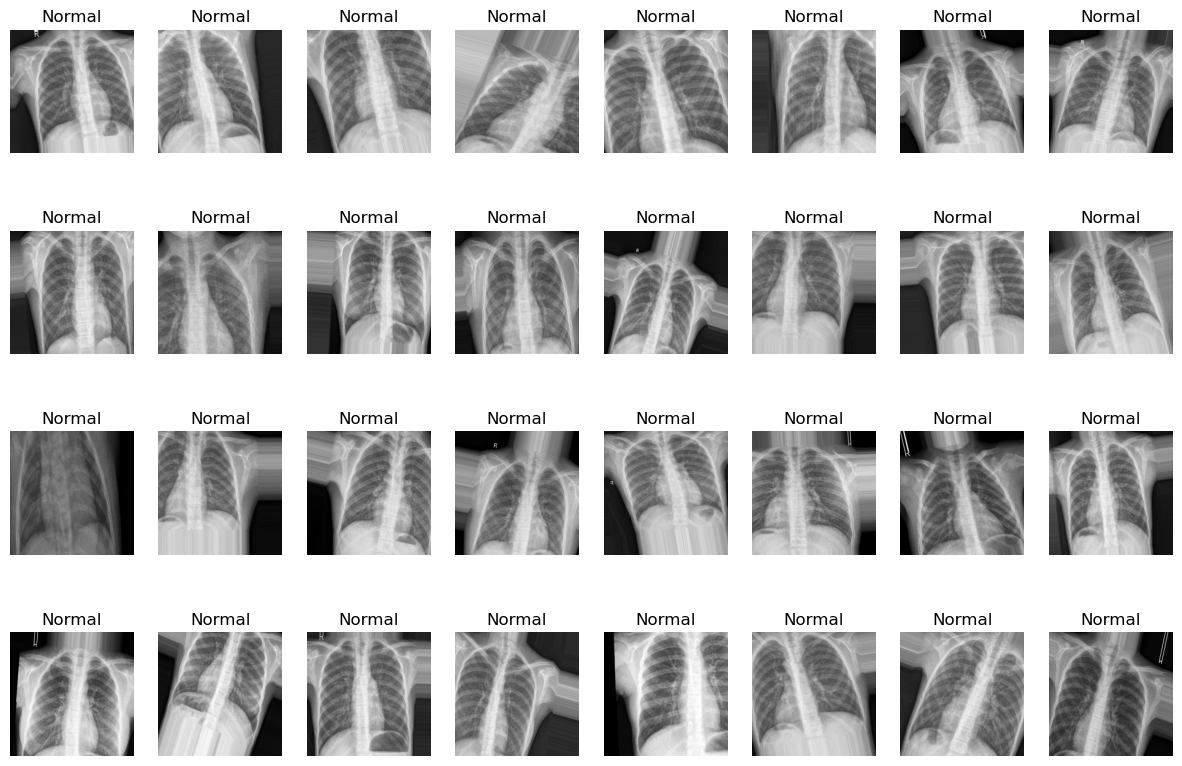

In [12]:
import matplotlib.pyplot as plt

# Gere um batch de imagens pré-processadas do conjunto de teste
test_generator = datagen.flow_from_directory(test_data_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary',
                                             shuffle=False)

# Obtenha um batch de imagens e suas classes verdadeiras
x_batch, y_batch = test_generator.next()

# Plote as imagens
fig, axes = plt.subplots(4, 8, figsize=(15, 10))
axes = axes.ravel()

for i in range(32):
    # Obtenha a imagem pré-processada
    img = x_batch[i]
    
    # Desfaça a normalização para exibir a imagem corretamente
    img = img * 255
    
    # Converta a imagem para inteiros de 8 bits
    img = img.astype(np.uint8)
    
    # Plote a imagem
    axes[i].imshow(img)
    axes[i].axis('off')
    if y_batch[i] == 0:
        axes[i].set_title('Normal')
    else:
        axes[i].set_title('Pneumonia')
    
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()


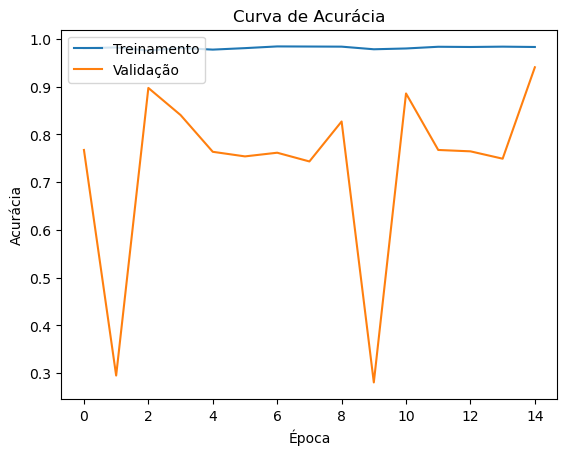

In [21]:
import matplotlib.pyplot as plt


# Plotar a curva de acurácia de treinamento e validação
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Curva de Acurácia')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend(['Treinamento', 'Validação'], loc='upper left')
plt.show()


In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Obtenha as previsões do modelo para o conjunto de teste
y_pred = model.predict(test_generator)
y_pred = np.round(y_pred)

# Obtenha as classes verdadeiras do conjunto de teste
y_true = test_generator.classes

# Calcule as métricas de avaliação
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1score = f1_score(y_true, y_pred)

# Imprima as métricas
print('Acurácia: {:.2f}'.format(accuracy))
print('Precisão: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('F1-score: {:.2f}'.format(f1score))



20/20 [==============================] - 14s 657ms/step
Acurácia: 0.89
Precisão: 0.87
Recall: 0.97
F1-score: 0.92


20/20 [==============================] - 14s 670ms/step


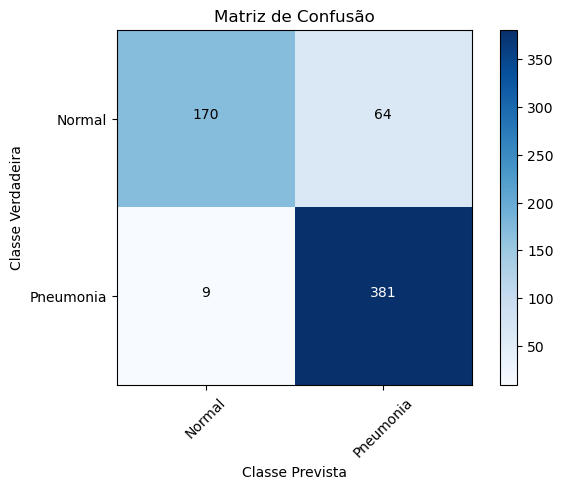

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

# Obtenha as previsões do modelo para o conjunto de teste
y_pred = model.predict(test_generator)
y_pred = np.round(y_pred)

# Obtenha as classes verdadeiras do conjunto de teste
y_true = test_generator.classes

# Calcule a matriz de confusão
cm = confusion_matrix(y_true, y_pred)

# Defina as classes
class_names = ['Normal', 'Pneumonia']

# Função para plotar a matriz de confusão
def plot_confusion_matrix(cm, classes, normalize=False, title='Matriz de Confusão', cmap=plt.cm.Blues):
    """
    Função para plotar a matriz de confusão.
    
    Parâmetros:
        - cm: matriz de confusão
        - classes: lista de nomes das classes
        - normalize: booleano indicando se a matriz de confusão deve ser normalizada (default: False)
        - title: título do gráfico (default: 'Matriz de Confusão')
        - cmap: mapa de cores a ser utilizado (default: plt.cm.Blues)
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Classe Verdadeira')
    plt.xlabel('Classe Prevista')

# Plotar a matriz de confusão
plot_confusion_matrix(cm, classes=class_names, normalize=False, title='Matriz de Confusão')
plt.show()
